<a href="https://colab.research.google.com/github/kridtapon/Aroon-CCI-Momentum-Strategy/blob/main/Aroon_CCI_Momentum_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [1]:
pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.54
    Uninstalling yfinance-0.2.54:
      Successfully uninstalled yfinance-0.2.54


In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate Aroon Oscillator
def calculate_aroon(df, period=14):
    """
    Calculate the Aroon Oscillator.
    """
    aroon_up = ((df['High'].rolling(window=period).apply(lambda x: np.argmax(x) + 1) - 1) / period) * 100
    aroon_down = ((df['Low'].rolling(window=period).apply(lambda x: np.argmin(x) + 1) - 1) / period) * 100
    aroon_oscillator = aroon_up - aroon_down
    return aroon_oscillator

# Function to calculate Commodity Channel Index (CCI)
def calculate_cci(df, period=20):
    """
    Calculate the Commodity Channel Index (CCI).
    """
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    sma = typical_price.rolling(window=period).mean()
    mean_deviation = (typical_price - sma).abs().rolling(window=period).mean()
    cci = (typical_price - sma) / (0.015 * mean_deviation)
    return cci

# Define the stock symbol and time period
symbol = 'META'  # SPY is the symbol for the S&P 500 ETF
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate Aroon Oscillator
df['Aroon_Oscillator'] = calculate_aroon(df)

# Calculate Commodity Channel Index (CCI)
df['CCI'] = calculate_cci(df)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on Aroon Oscillator and CCI
df['Entry'] = (df['Aroon_Oscillator'] > 0) & (df['CCI'] > 100)
df['Exit'] = (df['Aroon_Oscillator'] < 0) & (df['CCI'] < -100)

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-e119eb8f0802>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-e119eb8f0802>:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to

Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                           201605.679484
Total Return [%]                       101.605679
Benchmark Return [%]                   180.172857
Max Gross Exposure [%]                      100.0
Total Fees Paid                       4234.301522
Max Drawdown [%]                        50.578634
Max Drawdown Duration                       431.0
Total Trades                                   17
Total Closed Trades                            16
Total Open Trades                               1
Open Trade PnL                       -9730.132385
Win Rate [%]                                 37.5
Best Trade [%]                         128.218835
Worst Trade [%]                        -18.362456
Avg Winning Trade [%]                   37.977475
Avg Losing Trade [%]                    -8.856734


Streaming output truncated to the last 5000 lines.
<ipython-input-17-3523204369da>:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-3523204369da>:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-3523204369da>:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Best Aroon Period: 38
Best CCI Period: 10
Best Total Return [%]: 455.5680911615135
Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                         1258 days 00:00:00
Start Value                              100000.0
End Value                           555568.091162
Total Return [%]                       455.568091
Benchmark Return [%]                   174.090955
Max Gross Exposure [%]                      100.0
Total Fees Paid                       4320.598206
Max Drawdown [%]                         31.36818
Max Drawdown Duration           426 days 00:00:00
Total Trades                                    9
Total Closed Trades                             8
Total Open Trades                               1
Open Trade PnL                       202126.63918
Win Rate [%]                                 37.5
Best Trade [%]                         174.267767
Worst Trade [%]                          -8.28288
Avg Winning Trade

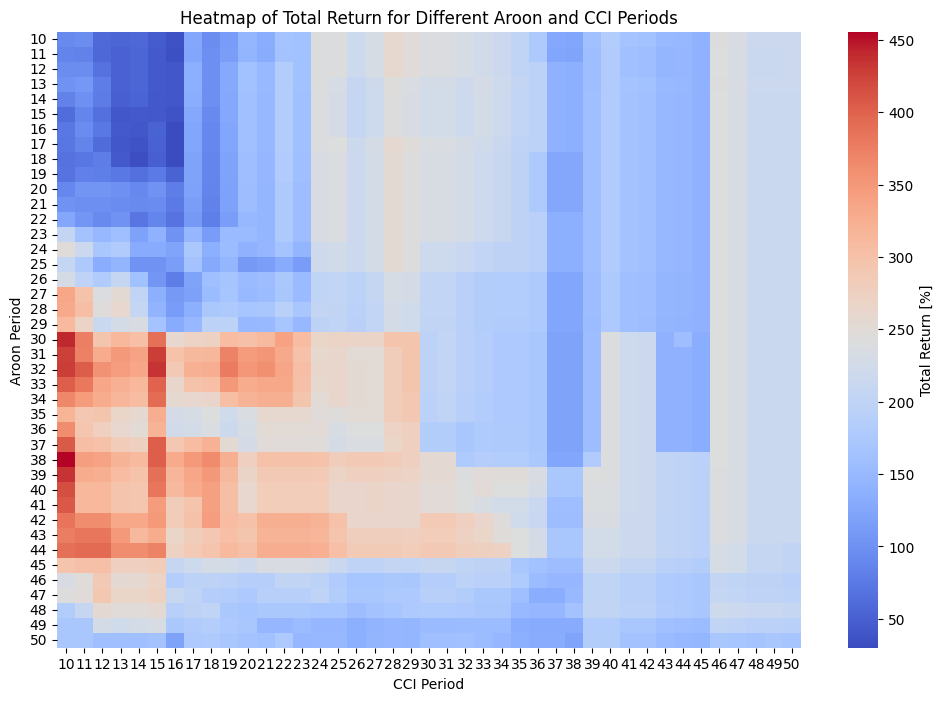

In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate Aroon Oscillator
def calculate_aroon(df, period=14):
    aroon_up = ((df['High'].rolling(window=period).apply(lambda x: np.argmax(x) + 1) - 1) / period) * 100
    aroon_down = ((df['Low'].rolling(window=period).apply(lambda x: np.argmin(x) + 1) - 1) / period) * 100
    aroon_oscillator = aroon_up - aroon_down
    return aroon_oscillator

# Function to calculate Commodity Channel Index (CCI)
def calculate_cci(df, period=20):
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    sma = typical_price.rolling(window=period).mean()
    mean_deviation = (typical_price - sma).abs().rolling(window=period).mean()
    cci = (typical_price - sma) / (0.015 * mean_deviation)
    return cci

# Define the stock symbol and time period
symbol = 'TPR'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Create a grid of parameter values for Aroon and CCI periods
aroon_periods = range(10, 51)  # Aroon period range
cci_periods = range(10, 51)    # CCI period range

best_return = -np.inf
best_params = None
best_portfolio = None

# Initialize a dataframe to store the total returns for each combination of parameters
total_returns = pd.DataFrame(index=aroon_periods, columns=cci_periods, dtype=float)

# Loop through all combinations of parameters
for aroon_period, cci_period in product(aroon_periods, cci_periods):
    # Calculate Aroon Oscillator
    df['Aroon_Oscillator'] = calculate_aroon(df, period=aroon_period)

    # Calculate Commodity Channel Index (CCI)
    df['CCI'] = calculate_cci(df, period=cci_period)

    # Filter data for the test period (2020-2025)
    df_test = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

    # Define Entry and Exit signals based on Aroon Oscillator and CCI
    df_test['Entry'] = (df_test['Aroon_Oscillator'] > 0) & (df_test['CCI'] > 100)
    df_test['Exit'] = (df_test['Aroon_Oscillator'] < 0) & (df_test['CCI'] < -100)

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=df_test['Close'],
        entries=df_test['Entry'],
        exits=df_test['Exit'],
        init_cash=100_000,
        fees=0.001,
        freq='D'
    )

    # Get total return as the performance metric
    total_return = portfolio.stats()['Total Return [%]']

    # Store the total return for the current parameter combination
    total_returns.at[aroon_period, cci_period] = total_return

    # Update the best parameters if the current total return is higher
    if total_return > best_return:
        best_return = total_return
        best_params = (aroon_period, cci_period)
        best_portfolio = portfolio

# Print the best parameters and the corresponding Sharpe ratio
print(f"Best Aroon Period: {best_params[0]}")
print(f"Best CCI Period: {best_params[1]}")
print(f"Best Total Return [%]: {best_return}")

# Display performance metrics of the best portfolio
print(best_portfolio.stats())

# Plot equity curve of the best portfolio
best_portfolio.plot().show()

# Plot the heatmap of total returns for all parameter combinations
plt.figure(figsize=(12, 8))
sns.heatmap(total_returns, annot=False, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Total Return [%]'})
plt.title('Heatmap of Total Return for Different Aroon and CCI Periods')
plt.xlabel('CCI Period')
plt.ylabel('Aroon Period')
plt.show()
